In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
DATA_PATH = '../01.Data'
sns.set_theme()
sns.set_theme(style="darkgrid")

In [2]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
    
def plot_vars(data,breath_id:list,x_var = 'time_step',y_var = 'u_in',hue = None,only_insp = True):
    breath_df = data[data['breath_id'].isin(breath_id)].reset_index(drop = True)
    if only_insp:
        breath_df = breath_df[breath_df['u_out']==0].reset_index(drop = True)
    sns.lineplot(data = breath_df, x = x_var, y = y_var, hue = hue)
    
def plot_multiple_vars(data,breath_id,x_var = 'time_step',y_var = ['u_in'],hue = None,only_insp = True):
    breath_df = data[data['breath_id'].isin([breath_id])].reset_index(drop = True)
    if only_insp:
        breath_df = breath_df[breath_df['u_out']==0].reset_index(drop = True)
    for y_v in y_var:
        sns.lineplot(data = breath_df, x = x_var, y = y_v,label = y_v)
        plt.title(f'Breath for R:{breath_df.R.unique()[0]} & C:{breath_df.C.unique()[0]}')
        plt.ylabel('Units')
    plt.legend()
def calc_idsrc(df,R,C):
    return df[(df['R']==R)&(df['C']==C)].reset_index(drop = True).breath_id.unique()

def analize_rc_combo(df_train,df_test,R = 50, C = 50,vals = 10):
    
    ids_train_rc = calc_idsrc(df_train,R,C)
    ids_test_rc  = calc_idsrc(df_test,R,C)
    print(f'Len Train ids_rc: {len(ids_train_rc)}')
    print(f'Len Test ids_rc: {len(ids_test_rc)}')
    plt.figure(figsize=(25, 6))
    #plt.suptitle(f"R: {R}, C: {C}", fontsize=14) 
    # First plot:
    plt.subplot(1,3,1)
    plt.title(f'Train U_in')
    plot_vars(df_train,ids_train_rc[0:vals],x_var = 'time_step',y_var = 'u_in',hue = 'breath_id')
    # Second plot
    plt.subplot(1,3,2)
    plt.title(f'Train Pressure')
    plot_vars(df_train,ids_train_rc[0:vals],x_var = 'time_step',y_var = 'pressure',hue = 'breath_id')
    # Third plot
    plt.subplot(1,3,3)
    plt.title(f'Test U_in')    
    plot_vars(df_test,ids_test_rc[0:vals],x_var = 'time_step',y_var = 'u_in',hue = 'breath_id')
    plt.tight_layout()
    plt.show()
    del ids_train_rc,ids_test_rc

def plots_rcs(df_train,df_test,vals = 10):
    for (r,c) in df_train[['R','C']].drop_duplicates().sort_values(by = ['R','C']).values:
        print('============================')
        print(f"\033[1m R:{r}, C:{c} \033[0m")
        print('============================')
        analize_rc_combo(df_train,df_test,R = r, C = c,vals = vals)

In [3]:
%%time
train_df = pd.read_csv(os.path.join(DATA_PATH,'train.csv'))
test_df  = pd.read_csv(os.path.join(DATA_PATH,'test.csv'))

CPU times: user 4.22 s, sys: 730 ms, total: 4.95 s
Wall time: 4.95 s


In [4]:
train_breath = set(train_df.breath_id.unique()) 
test_breath = set(test_df.breath_id.unique()) 
print(f'# Breath id in train: {len(train_breath)}  # Breath id in test: {len(test_breath)}')
print(f'# Intersections of breath_id: {len(train_breath & test_breath)}')

# Breath id in train: 75450  # Breath id in test: 50300
# Intersections of breath_id: 0


In [5]:
display_side_by_side([train_df.head(),test_df.head()],captions = ['Train','Test'])

In [6]:
df_1 = train_df[['R','C']].value_counts(normalize = True).reset_index().rename(columns = {0:'count'})
df_2 = test_df[['R','C']].value_counts(normalize = True).reset_index().rename(columns = {0:'count'})
display_side_by_side([df_1,df_2],captions = ['Train','Test'])

In [23]:
train_df.head()

id  breath_id   R   C  time_step       u_in  u_out   pressure
0   1          1  20  50   0.000000   0.083334      0   5.837492
1   2          1  20  50   0.033652  18.383041      0   5.907794
2   3          1  20  50   0.067514  22.509278      0   7.876254
3   4          1  20  50   0.101542  22.808822      0  11.742872
4   5          1  20  50   0.135756  25.355850      0  12.234987

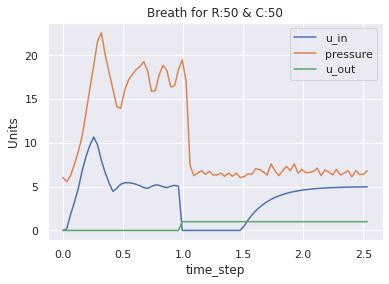

In [34]:
plot_multiple_vars(train_df,27,x_var = 'time_step',y_var = ['u_in','pressure','u_out'],hue = None,only_insp = False)

# Analyze By combination of (R,C)

 R:5, C:10 
Len Train ids_rc: 8312
Len Test ids_rc: 5437


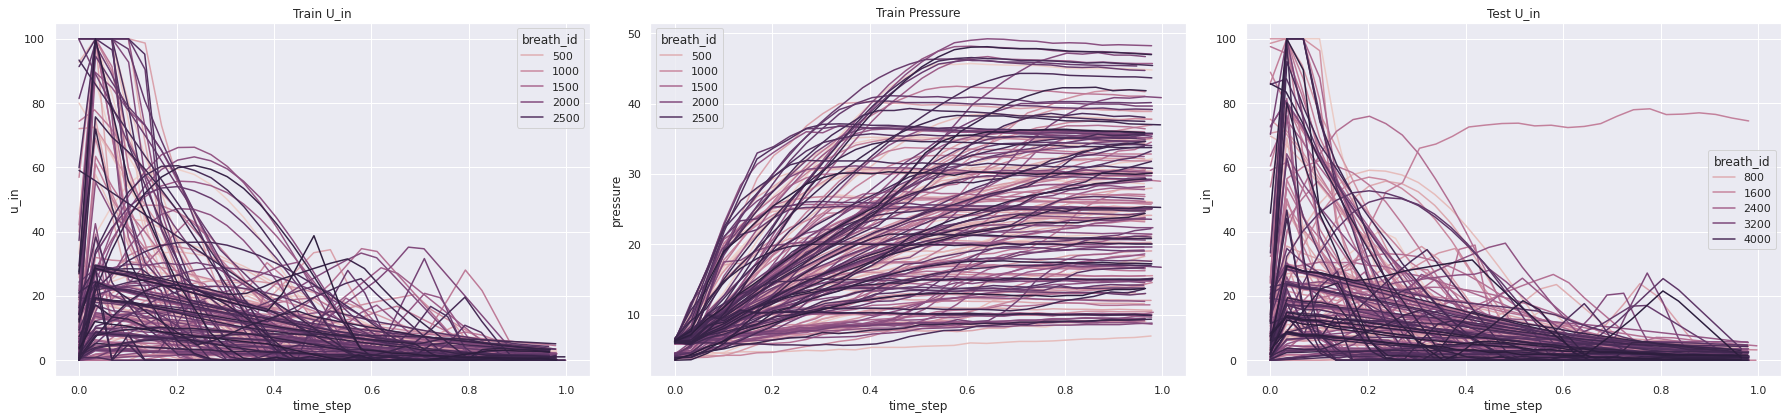

 R:5, C:20 
Len Train ids_rc: 8277
Len Test ids_rc: 5451


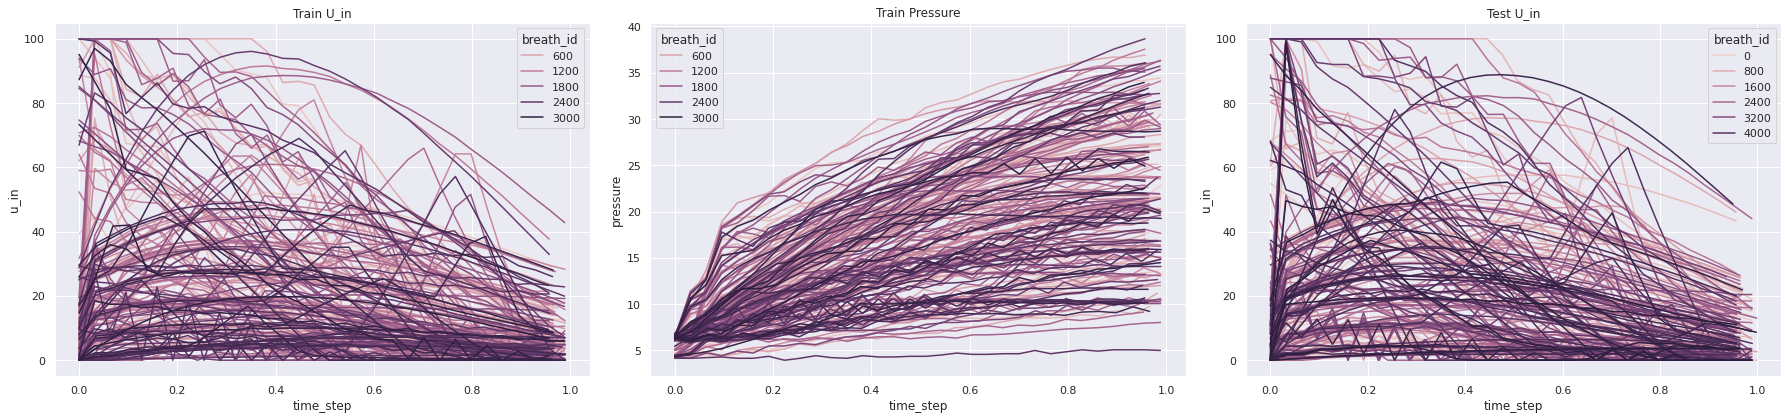

 R:5, C:50 
Len Train ids_rc: 8271
Len Test ids_rc: 5447


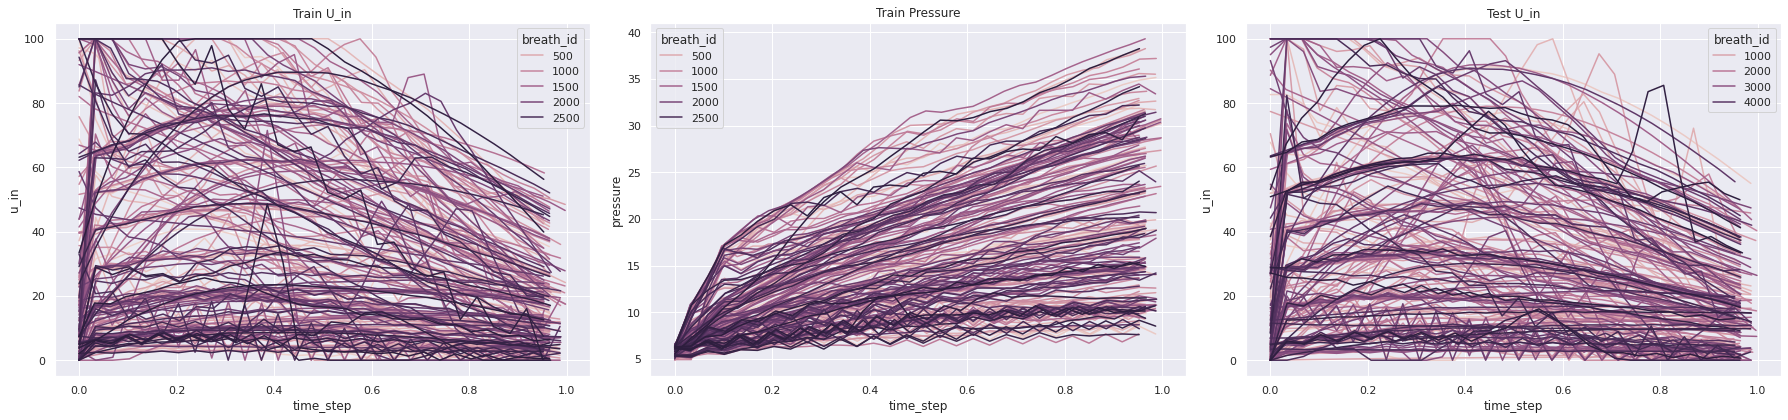

 R:20, C:10 
Len Train ids_rc: 6070
Len Test ids_rc: 4292


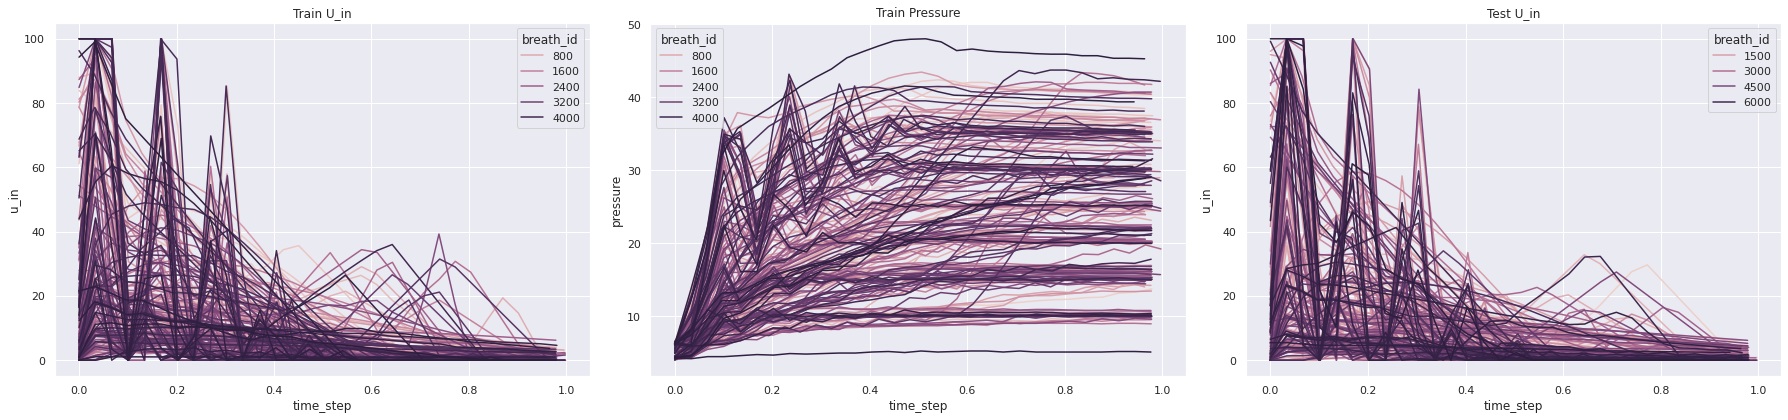

 R:20, C:20 
Len Train ids_rc: 6208
Len Test ids_rc: 4088


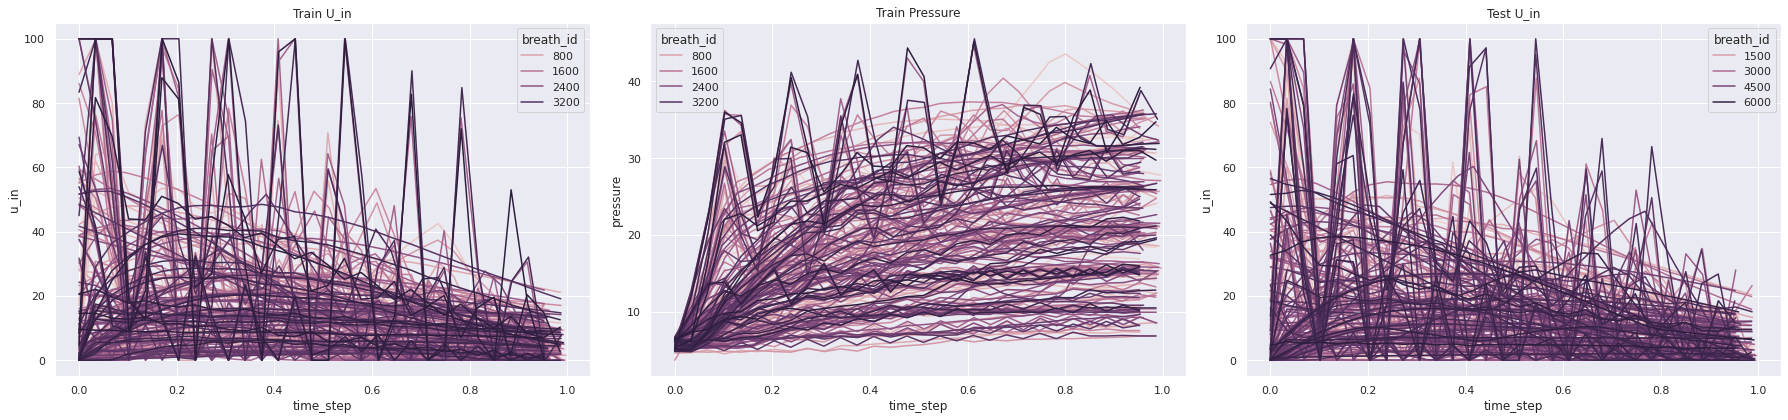

 R:20, C:50 
Len Train ids_rc: 8186
Len Test ids_rc: 5500


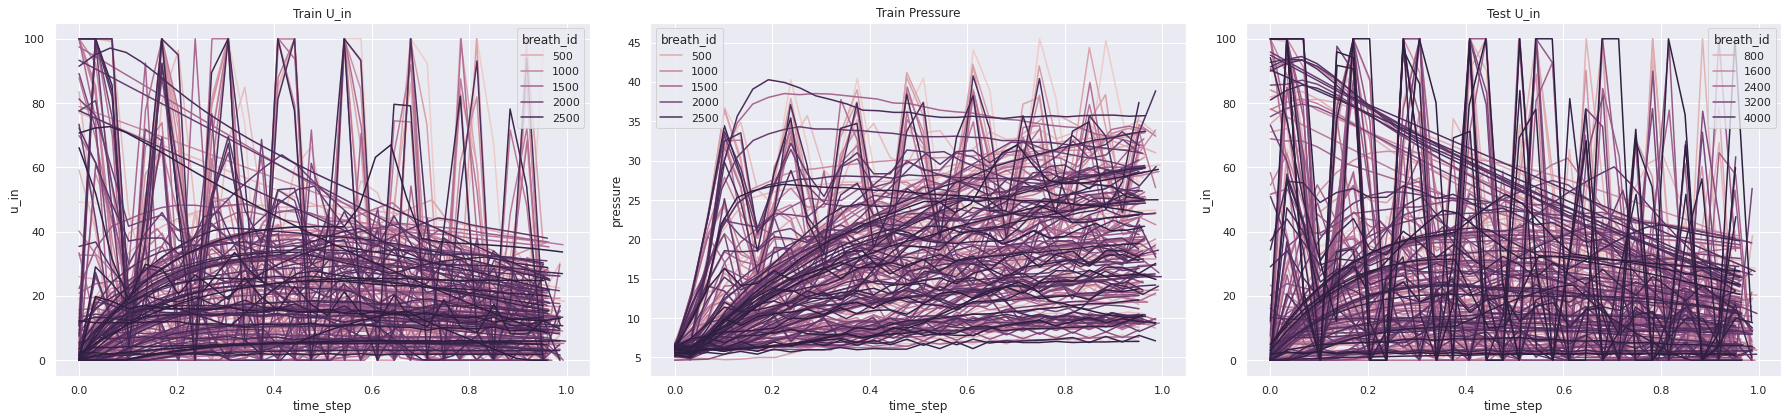

 R:50, C:10 
Len Train ids_rc: 13677
Len Test ids_rc: 9081


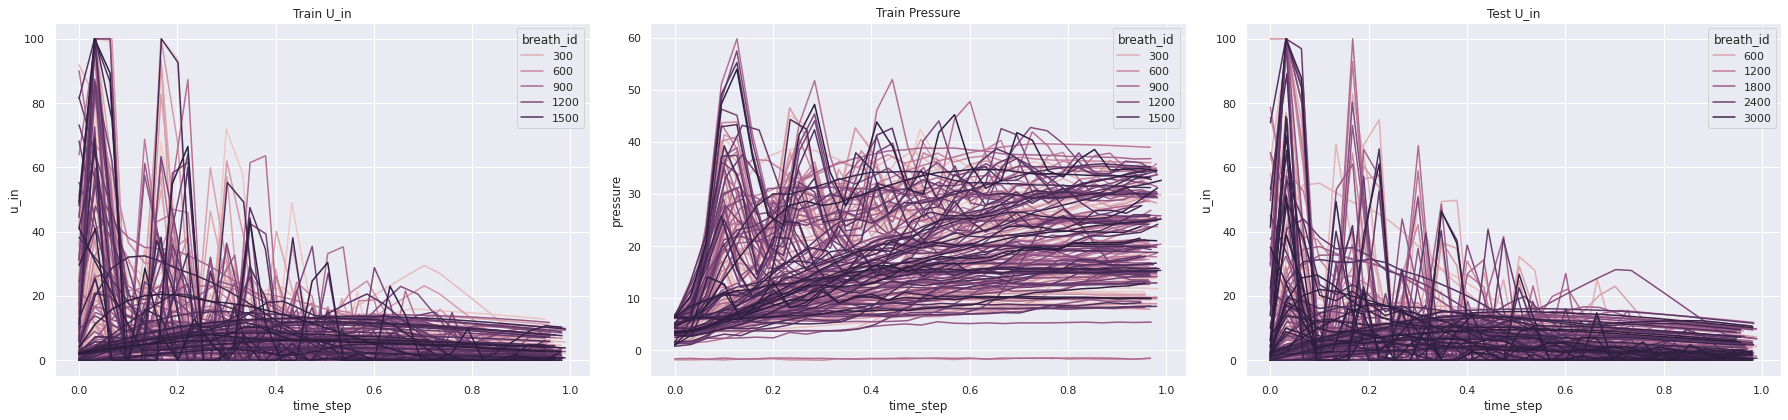

 R:50, C:20 
Len Train ids_rc: 8260
Len Test ids_rc: 5503


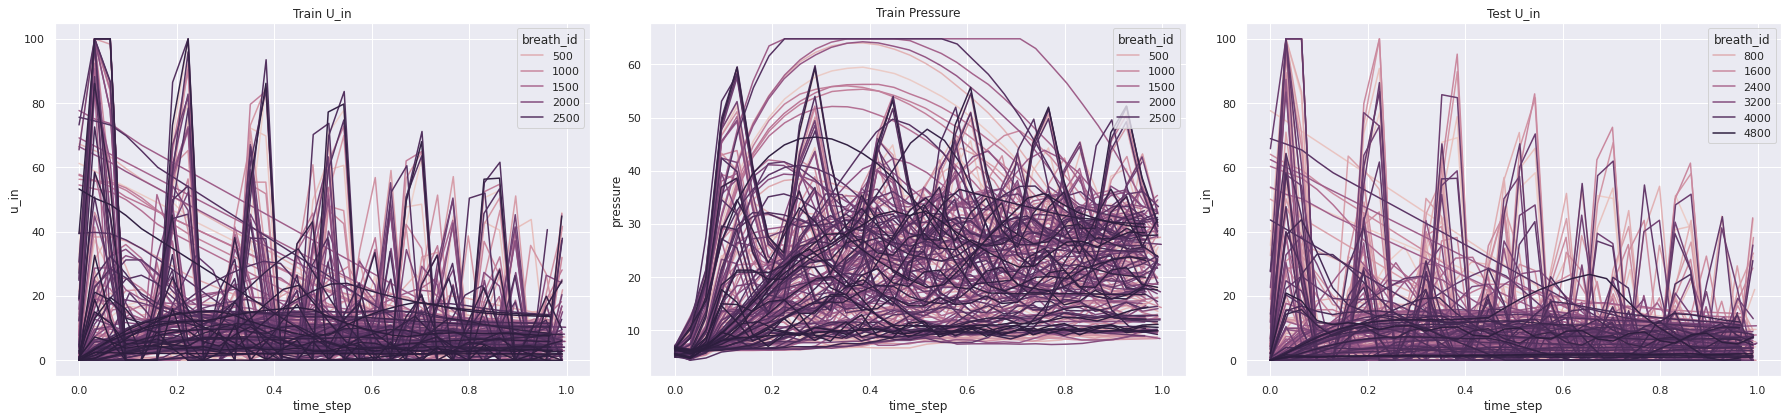

 R:50, C:50 
Len Train ids_rc: 8189
Len Test ids_rc: 5501


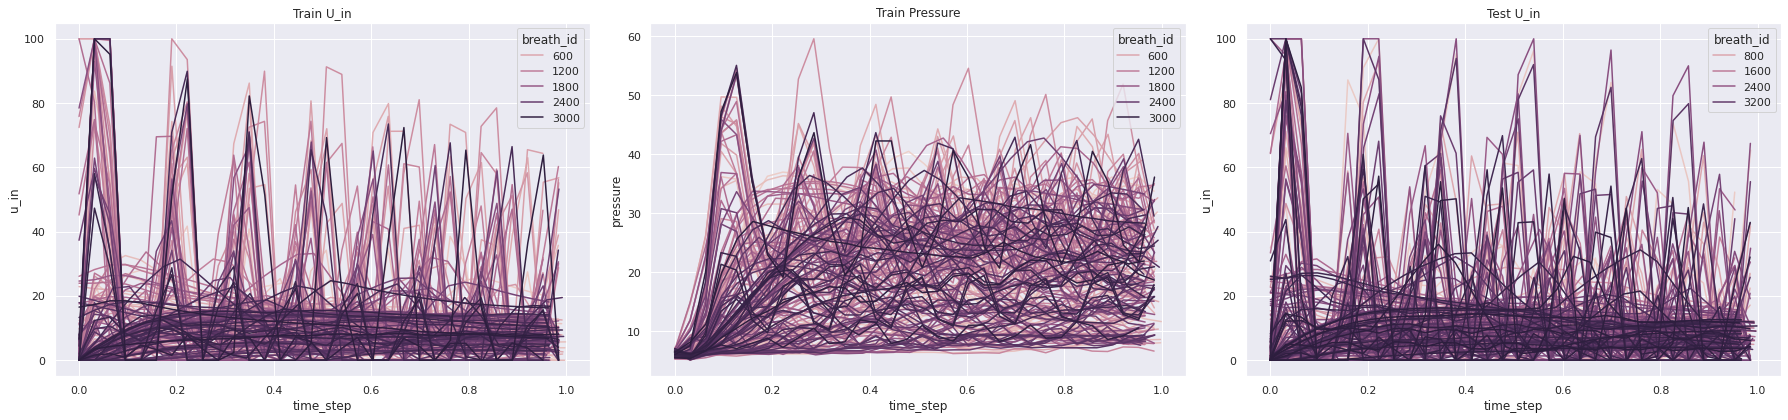

In [155]:
plots_rcs(train_df,test_df,vals = 200)

## Analyze FFT transformations

In [15]:
from scipy.fft import fft, fftfreq
from scipy.signal import blackman
import matplotlib.pyplot as plt

def FFT_(df,value):
    N = 80
    T = 1.0 
    df_loc = df.loc[df['breath_id'] == value]
    y = df_loc['u_in'].to_numpy()
    v = df_loc['pressure'].to_numpy()    

    w = blackman(N)
    
    yf = fft(y)
    vf = fft(v)
    ywf = fft(y*w)
    vwf = fft(v*w)
    
    xf = fftfreq(N, T)[:N//2]
    vxf = fftfreq(N, T)[:N//2]

    plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-r')
    plt.semilogy(vxf[1:N//2], 2.0/N * np.abs(vf[1:N//2]), '-b')
    plt.legend(['FFT u_in', 'FFT pressure'])
    plt.grid()
    plt.show()
    
    plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
    plt.semilogy(vxf[1:N//2], 2.0/N * np.abs(vwf[1:N//2]), '-b')
    plt.legend(['FFT u_in w. window','FFT pressure w. window'])
    plt.grid()
    plt.show()
    
FFT_(df,2)

NameError: name 'df' is not defined